# Project: Investigate demographic data and user behaviour from Vestiaire Collective

Submitted by: Melvil Lardinois



<center>
    <img src="https://img-3.journaldesfemmes.fr/oSz1Agz9ChvUSR6S5eTTvru5_D4=/1500x/smart/32b09b1a4d874dffb32cbb2454ab9437/ccmcms-jdf/33912894.jpg" alt="VC_banner" style='width:50%'/>
</center>

## Introduction

The data was scraped from a successful online Closet-to-Closet (C2C) fashion store, Vestiaire Collective, with over 10M registered users. The store was first launched in Europe around 2009 before being expanded worldwide. 

Source: https://www.kaggle.com/datasets/jmmvutu/ecommerce-users-of-a-french-c2c-fashion-store?select=6M-0K-99K.users.dataset.public.csv

The analysis is intended to serve as a reference point for any other C2C fashion e-commerce store. Through this data exploration, we're aiming to gain insights from user behavior and demographic statistics to outline clear trends and correlation for this use case.

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

users_main = pd.read_csv('data/users.csv')
buyers_per_country_main = pd.read_csv('data/buyers_repartition_by_country.csv')
sellers_per_country_main = pd.read_csv('data/countries_with_top_sellers_fashion_c2c.csv')

To summarize, the presented table pertains to the users of a C2C website where individuals can purchase and sell products from each other. Thus, this dataset can be analyzed to study either the buyers or sellers. Moreover, users can also follow or be followed by others and engage in social network-like activities such as "liking" products.

Each row in the table represents a single user's statistics.

In [21]:
users_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       98913 non-null  int64  
 1   type                 98913 non-null  object 
 2   country              98913 non-null  object 
 3   language             98913 non-null  object 
 4   socialNbFollowers    98913 non-null  int64  
 5   socialNbFollows      98913 non-null  int64  
 6   socialProductsLiked  98913 non-null  int64  
 7   productsListed       98913 non-null  int64  
 8   productsSold         98913 non-null  int64  
 9   productsPassRate     98913 non-null  float64
 10  productsWished       98913 non-null  int64  
 11  productsBought       98913 non-null  int64  
 12  gender               98913 non-null  object 
 13  civilityGenderId     98913 non-null  int64  
 14  civilityTitle        98913 non-null  object 
 15  hasAnyApp            98913 non-null 

> ## Demographic information

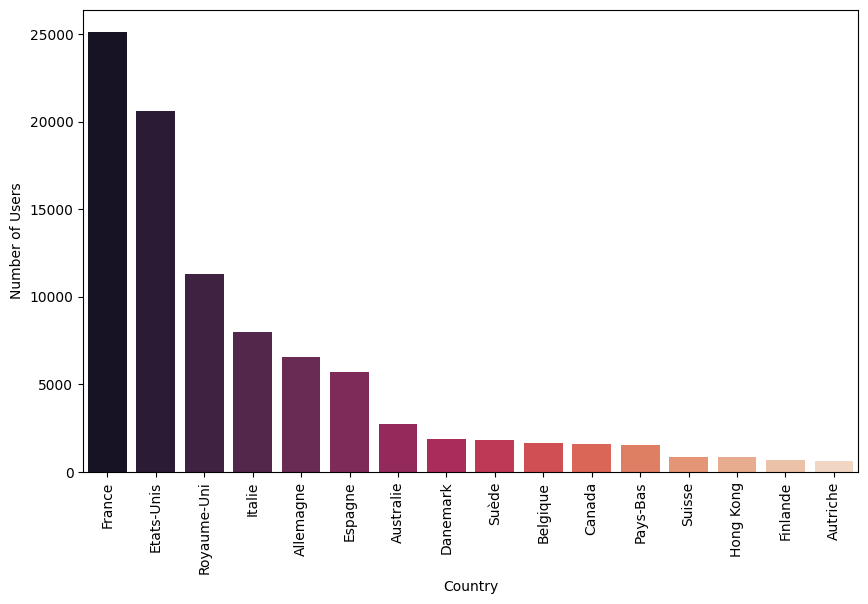

In [4]:
# Extract the columns relevant to the user data
user_data = users_main[['identifierHash', 'country']]

# Count the number of users per country
user_counts = user_data['country'].value_counts()

# Filter out countries with less than 5 users
user_counts = user_counts[user_counts >= 500]

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=user_counts.index, y=user_counts.values, ax=ax, palette='rocket')

ax.set_xlabel('Country')
ax.set_ylabel('Number of Users')
plt.xticks(rotation=90)
plt.show()

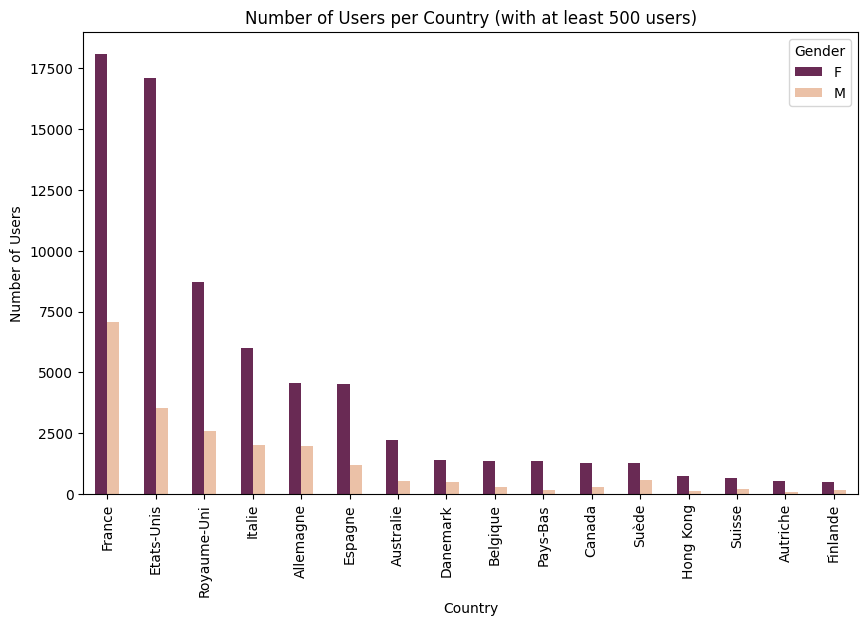

In [5]:
# Extract the columns relevant to the user data
gender_data = users_main[['identifierHash', 'country', 'gender']]

# Filter out countries with less than 500 users
country_counts = gender_data.groupby('country').count()
selected_countries = country_counts[country_counts['identifierHash'] >= 500].index.tolist()
gender_data = gender_data[gender_data['country'].isin(selected_countries)]

# Count the number of users per country and gender
user_counts = gender_data.groupby(['country', 'gender']).count().reset_index()

# Pivot the data to get separate columns for male and female user counts
user_counts = user_counts.pivot(index='country', columns='gender', values='identifierHash')

# Sort the countries by the number of female users
user_counts = user_counts.sort_values(by='F', ascending=False)

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
user_counts.plot(kind='bar', ax=ax, color=['#692A54', '#EBC1A7'])
ax.set_title('Number of Users per Country (with at least 500 users)')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Users')
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees
plt.legend(title='Gender', loc='upper right')
plt.show()

In [6]:
from prettytable import PrettyTable

# Extract the columns relevant to the user data
gender_data = users_main[['identifierHash', 'country', 'gender']]

# Filter out countries with less than 500 users
country_counts = gender_data.groupby(['country']).count().reset_index()
valid_countries = country_counts[country_counts['identifierHash'] >= 500]['country'].tolist()
gender_data = gender_data[gender_data['country'].isin(valid_countries)]

# Count the number of users per country and gender
user_counts = gender_data.groupby(['country', 'gender']).count().reset_index()

# Pivot the data to get separate columns for male and female user counts
user_counts = user_counts.pivot(index='country', columns='gender', values='identifierHash')

# Compute the male vs female user ratio per country
user_counts['M/F Ratio'] = user_counts['M'] / user_counts['F']

# Sort the countries by the male vs female user ratio
user_counts = user_counts.sort_values(by='M/F Ratio', ascending=False)

# Create a PrettyTable object
table = PrettyTable()
table.field_names = ['Country', 'Female Users', 'Male Users', 'M/F Ratio']

# Add data to the table
for country, row in user_counts.iterrows():
    table.add_row([country, int(row['F']), int(row['M']), round(row['M/F Ratio'], 2)])

# Print the table
print(table)

+-------------+--------------+------------+-----------+
|   Country   | Female Users | Male Users | M/F Ratio |
+-------------+--------------+------------+-----------+
|    Suède    |     1257     |    569     |    0.45   |
|  Allemagne  |     4577     |    1990    |    0.43   |
|    France   |    18085     |    7050    |    0.39   |
|    Italie   |     5984     |    2031    |    0.34   |
|   Finlande  |     494      |    167     |    0.34   |
|   Danemark  |     1414     |    478     |    0.34   |
| Royaume-Uni |     8732     |    2578    |    0.3    |
|    Suisse   |     667      |    192     |    0.29   |
|   Espagne   |     4527     |    1179    |    0.26   |
|  Australie  |     2203     |    516     |    0.23   |
|    Canada   |     1289     |    288     |    0.22   |
|   Belgique  |     1374     |    292     |    0.21   |
|  Etats-Unis |    17079     |    3523    |    0.21   |
|   Autriche  |     536      |     88     |    0.16   |
|  Hong Kong  |     748      |    106     |    0

At a first glance, the app mostly has European users, with France being the most popular country (as the founder country). 

After calculating the MALE / FEMALE ratio per country, I'm intrigued by the big difference between France and the USA. Later on, I will investigate specifically for these two countries and try to figure out if there could be a user behaviour difference. 

> ## User behaviour

### Selecting active users

At present, the dataset comprises a large number of inactive users, who may have only registered to explore the website, view a few articles, and then abandoned it. The website strongly encourages users to sign up, or else their browsing is limited, which could be one reason for the high proportion of passive users.

Considering the fact that the website operates on a C2C business model that generates revenue when products are sold, I will identify and refer to **active** users as those whose actions on the platform directly contribute to this goal, like potential buyers and potential sellers.

Active users are defined as individuals who meet either of the following criteria:

- **prospective buyers**: those interacted with products of others with a like/wishlist/purchase.
- **prospective sellers**: those having at least one product for sale.

Furthermore, I categorize accounts as social users if they have interacted with other accounts by following them or gaining followers. In addition, to analyze **buyer-specific** or **seller-specific** behavior, I will filter these particular segments. To further investigate the behavior of social users, a subset will be created. To achieve this, the following code will create the specified user segments.

In [7]:
# Drop irrelevant columns
users_new = users_main.drop(['seniority', 'seniorityAsYears', 'civilityGenderId', 'country', 'identifierHash', 'type'], axis=1)

# Filtering out users that are completely passive from the dataframe
active_fields = ['socialProductsLiked', 'productsListed', 'productsSold', 'productsPassRate', 'productsWished', 'productsBought']
active_df = users_new[users_new[active_fields].gt(0).any(axis=1)]

# Buyers
buyers_df = users_new[users_new.productsBought > 0]

# Prospecting Sellers (has sold a product or is still trying do his/her first sale)
sellers_df = users_new[(users_new.productsListed > 0) | (users_new.productsSold > 0)]

# Successful sellers (at least 1 product sold)
successful_sellers_df = users_new[users_new.productsSold > 0]

# Social users
social_df = users_new[ (users_new['socialNbFollowers'] != 3) | (users_new['socialNbFollows'] != 8) ]

print("Out of the " + str(users_new.shape[0]) + " users of the dataset sample, there are:\n")
print("- " + str(active_df.shape[0]) + " active users (" + str(round(100*active_df.shape[0]/users_new.shape[0], 2)) + "%). Among these prospective buyers and sellers")
print("  - " + str(active_df.shape[0] - sellers_df.shape[0]) + " are prospective buyers")
print(" among which " + str(buyers_df.shape[0]) + " people actually bought products (at least 1)")
print("  - " + str(sellers_df.shape[0]) + " are prospective sellers")
print(" among which " + str(successful_sellers_df.shape[0]) + " are successful sellers (>= 1 product successfully sold)\n")
print("- " + str(social_df.shape[0]) + " people using social network features such as following accounts or getting followers")
print("\nAmong the sellers mentioned above, some may also be as buyers and vice versa.")

Out of the 98913 users of the dataset sample, there are:

- 21639 active users (21.88%). Among these prospective buyers and sellers
  - 18920 are prospective buyers
 among which 5419 people actually bought products (at least 1)
  - 2719 are prospective sellers
 among which 2036 are successful sellers (>= 1 product successfully sold)

- 15595 people using social network features such as following accounts or getting followers

Among the sellers mentioned above, some may also be as buyers and vice versa.


### Correlation matrix

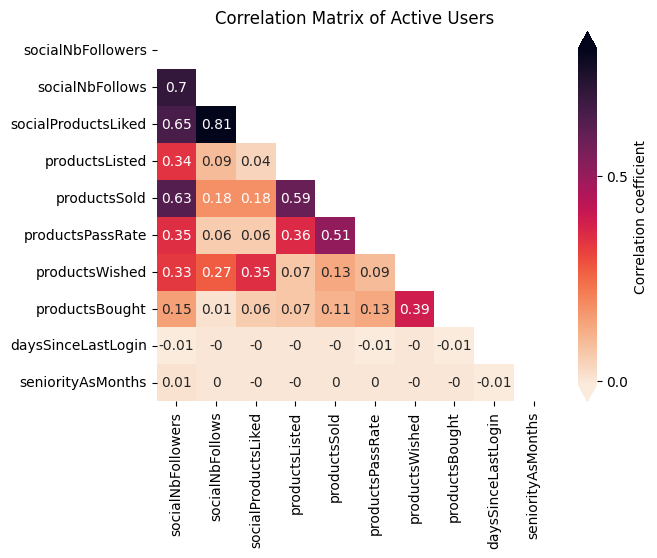

In [26]:
# select only the numerical columns
num_cols = users_new.select_dtypes(include='number').columns

# compute the correlation matrix
corr_matrix = users_new[num_cols].corr().round(2)

# create a mask to hide the upper triangle of the matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# plot the heatmap with the "rocket" color palette and inverted colors
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="rocket_r", cbar_kws={"ticks": np.arange(1, -1.1, -0.5), "orientation": "vertical", "extend": "both", "label": "Correlation coefficient"})

# set the title and show the plot
plt.title("Correlation Matrix of Active Users")
plt.show()


#### Buyers

I'm looking at this: 0.39 correlation points between **Wished Products** and Purchases, but only 0.06 points between **Liked Products** and Purchases.

It is worth noting how users perceive wishlists and likes as this can significantly impact their overall experience. Wishlisting an item seems to indicate a much clearer purchase intention than liking it.

By offering both options, it may be possible to gain a better understanding of a user's preferences and intentions, which can then be used to recommend more suitable products. This finding has broader implications beyond C2C platforms, as traditional e-commerce stores (B2C) could also integrate like and wishlist features to enhance their understanding of customers and potential customers. By solely relying on cart items, businesses would miss out on the opportunity for more precise targeting.

#### Sellers

We see a strong correlation (0.63) between **Sales and Number of followers**. This is logical and could be due to two factors :

- A seller gets followers by selling products (and thus being granted a badge of "trusted" seller, which in turn will get him/her to sell more).

- It's possible that on C2C platforms, successful sellers first attract subscribers and subsequently build trust by exhibiting high-quality products, which can then convert potential customers into clients.

Usually C2C platforms allow sellers to advertise themselves by giving them the ability to customize their shop page or pay for ads to boost their listing's visibility.

#### Additional observation


Another point we could look at is the **absence of correlation between Purchases and the number of follows** (0.01).

It may seem counter-intuitive that buyers are not necessarily following accounts they wish to purchase from or sellers with products they intend to buy. One possible explanation is that users typically follow profiles that share their tastes, whether it be to keep up with trends or gain inspiration from influencers and other people in their social network.

From a business perspective, it may appear that implementing a feature for users to follow inspiring accounts would not directly lead to an increase in overall sales on the website. However, as the previous results indicate, individual sellers benefit from gaining more followers, as they compete with each other to grab the buyers' attention. Therefore, while a "follow" feature may not necessarily increase sales for the entire C2C website, it can motivate sellers to improve their presence on the platform, which can ultimately lead to their success. After all, sellers are the driving force behind a C2C business, and nurturing their success can be a factor that distinguishes successful C2C businesses from their competitors.

### Extra numbers on buyers and sellers

#### Buyers

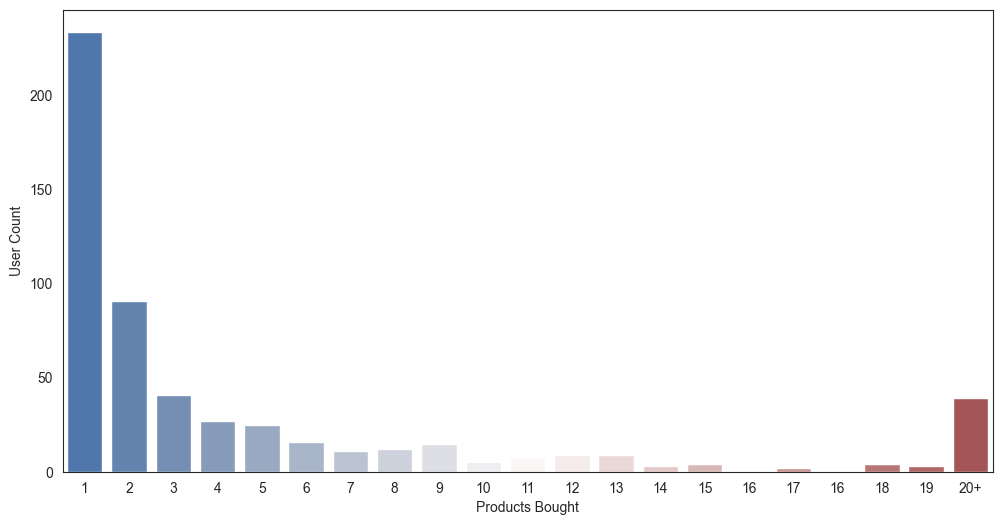

In [298]:
buyers_df = users_new[users_new.productsBought > 0].copy()

def group_products_bought(x):
    if x <= 20:
        return x
    else:
        return "20+"

buyers_df["products_bought_grouped"] = buyers_df["productsSold"].apply(group_products_bought)

order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 16, 18, 19, "20+"]

sns.set_style("white")
plt.figure(figsize=(12,6))
sns.countplot(data=buyers_df, x="products_bought_grouped", order=order, palette='vlag')
plt.ylabel("User Count")
plt.xlabel("Products Bought")
plt.show()

In [299]:
# calculate the average and median of products bought
avg_products_bought = buyers_df['productsBought'].mean()
median_products_bought = buyers_df['productsBought'].median()

# print the results
print("Average products bought per active user:", avg_products_bought)
print("Median products bought per active user:", median_products_bought)

Average products bought per active user: 3.1382173832810483
Median products bought per active user: 1.0


#### Sellers

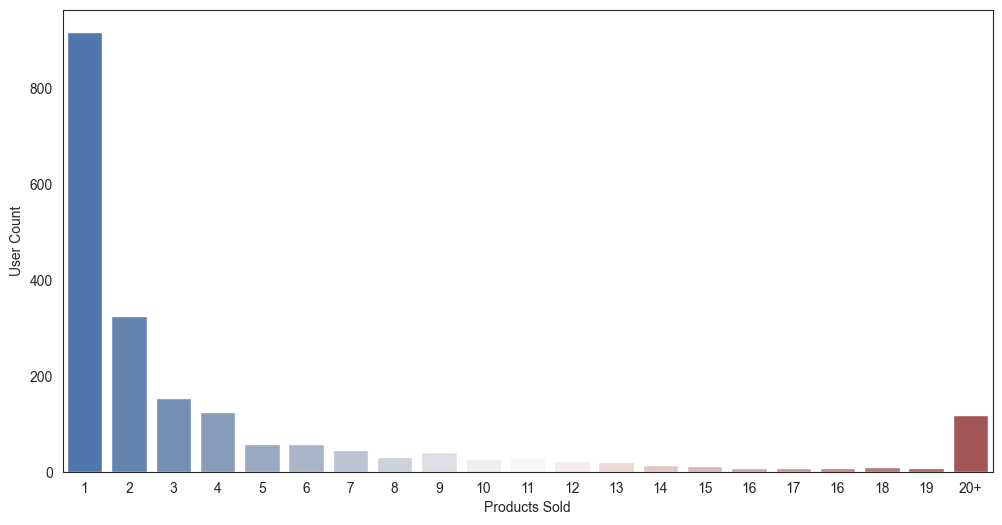

In [300]:
sellers_df = users_main[(users_main.productsListed > 0) | (users_main.productsSold > 0)].copy()

def group_products_sold(x):
    if x <= 20:
        return x
    else:
        return "20+"

sellers_df["products_sold_grouped"] = sellers_df["productsSold"].apply(group_products_sold)

order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 16, 18, 19, "20+"]

sns.set_style("white")
plt.figure(figsize=(12,6))
sns.countplot(data=sellers_df, x="products_sold_grouped", order=order, palette='vlag')
plt.ylabel("User Count")
plt.xlabel("Products Sold")
plt.show()

In [301]:
# calculate the average and median of products bought
avg_products_sold = sellers_df['productsSold'].mean()
median_products_sold = sellers_df['productsSold'].median()

# print the results
print("Average products sold per seller:", avg_products_sold)
print("Median products sold per seller:", median_products_sold)

Average products sold per seller: 4.423317396101508
Median products sold per seller: 1.0


> ## User retention

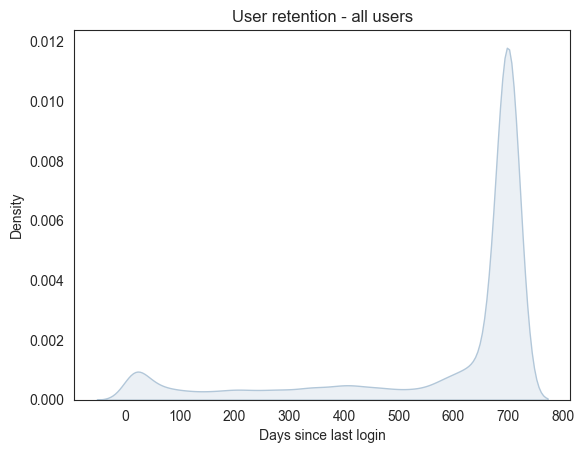

In [302]:
# For some reason, there were 10 users with an unrealistic number of days since last login, so I removed them for the next analysis
users_retention = users_main[users_main['daysSinceLastLogin'] <= 800]

# plot the density plot of days since last login
sns.kdeplot(users_retention['daysSinceLastLogin'], fill=True, color='#B2C7D9')
plt.xlabel("Days since last login")
plt.ylabel("Density")
plt.title("User retention - all users")

# remove the grid lines
ax = plt.gca()
ax.grid(False)

# set the x-axis ticks to show every 100 days
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))

plt.show()

We can see that the vast majority of users drop out quickly. This is true for most website/services/apps: a lot of people try it once, maybe twice and then never come back to the app.

But active users connect to the app at least once a month, given the spike at ~20days.

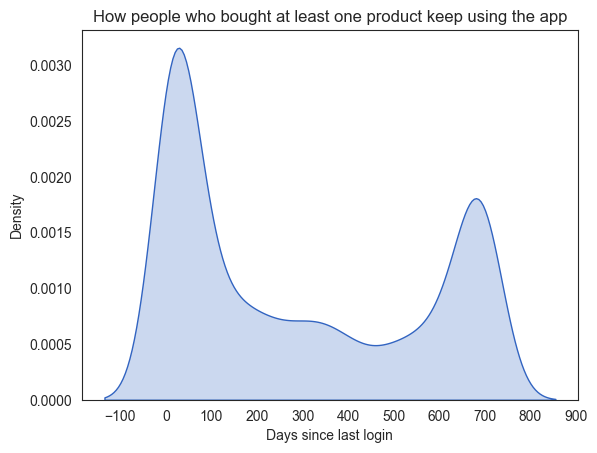

In [303]:
buyers_retention = buyers_df[buyers_df['daysSinceLastLogin'] <= 800]

# plot the density plot of days since last login
sns.kdeplot(buyers_retention['daysSinceLastLogin'], fill=True, color='#3264C1')
plt.xlabel("Days since last login")
plt.ylabel("Density")
plt.title("How people who bought at least one product keep using the app")

# remove the grid lines
ax = plt.gca()
ax.grid(False)

# set the x-axis ticks to show every 100 days
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))

plt.show()

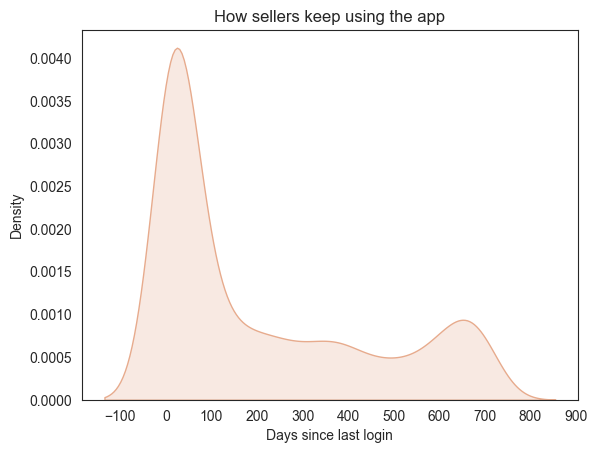

In [232]:
sellers_retention = sellers_df[sellers_df['daysSinceLastLogin'] <= 800]

# plot the density plot of days since last login
sns.kdeplot(sellers_retention['daysSinceLastLogin'], fill=True, color='#E7AB8D')

plt.xlabel("Days since last login")
plt.ylabel("Density")
plt.title("How sellers keep using the app")

# remove the grid lines
ax = plt.gca()
ax.grid(False)

# set the x-axis ticks to show every 100 days
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))

plt.show()

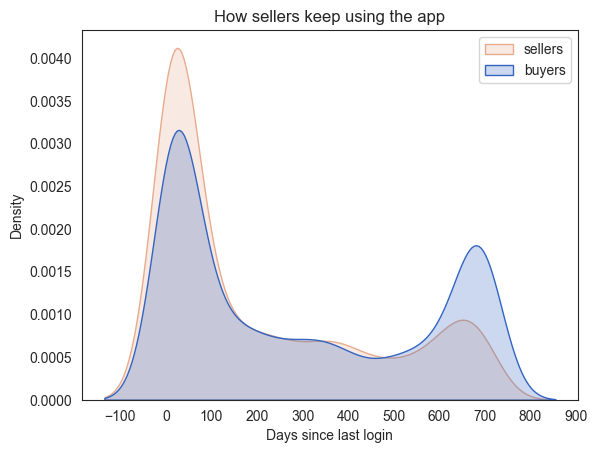

In [242]:
# plot the density plot of days since last login
sns.kdeplot(sellers_retention['daysSinceLastLogin'], fill=True, color='#E7AB8D', label='sellers')
sns.kdeplot(buyers_retention['daysSinceLastLogin'], fill=True, color='#3264C1', label='buyers')
plt.xlabel("Days since last login")
plt.ylabel("Density")
plt.title("How sellers keep using the app")

# remove the grid lines
ax = plt.gca()
ax.grid(False)

# set the x-axis ticks to show every 100 days
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))

# display the legend
plt.legend()

plt.show()

Buyers show mainly **two distinct behaviors**: one-time purchasers who never return (as shown by the first small bump), and those who become loyal customers over an extended period (the spike at the end of the curve).

Retaining and engaging the users who continue to use your platform is key to building a valuable asset for your business. Once a user has taken any action to engage with your platform, such as making a purchase or uploading products to sell, it's important to prioritize maintaining the relationship. This is not only a common-sense approach but also supported by actual data.

Additionally, there is a noticeable difference in the dropout curve between buyers and sellers. Sellers tend to try out the platform for a **shorter period before making a decision to stay or leave**.

Therefore, it is crucial in C2C platforms to ensure that:

1. The platform is user-friendly for sellers/service providers.
2. Provide the necessary tools for sellers, such as analytics and a flexible way to interact with prospective buyers.

> ## Differences between USA and France

First, let's compare the ratio of active users between these two countries.

In [342]:
france_users = users_main[users_main['country'] == 'France']
num_france_users = len(france_users)

us_users = users_main[users_main['country'] == 'Etats-Unis']
num_us_users = len(us_users)

france_users_active = active_df[active_df['countryCode'] == 'fr']
num_rows_fr = len(france_users_active)

us_users_active = active_df[active_df['countryCode'] == 'us']
num_rows_us = len(us_users_active)

print("Ratio of active users in France:", num_rows_fr/num_france_users)
print("Ratio of active users in the USA:", num_rows_us/num_us_users)

Ratio of active users in France: 0.19781181619256016
Ratio of active users in the USA: 0.19061256188719541


Both country share the **same active users ratio**. Can we find any difference in buyers or sellers behaviours ?

### Buyers

In [443]:
# We already have access to a csv file with pre-processed data for buyers grouped by country.
# Select only the rows with country equals to France or United States
france_usa_buyers = buyers_per_country_main.loc[(buyers_per_country_main['country'] == 'France') | (buyers_per_country_main['country'] == 'Etats-Unis')].copy()

# Create a copy of the original dataframe without the 'country' column
france_usa_buyers_nocountry = france_usa_buyers.drop('country', axis=1)

# Divide the values of the second row by the first row
ratio_row = france_usa_buyers_nocountry.iloc[1].div(france_usa_buyers_nocountry.iloc[0]).round(2)

# Add the resulting row to the dataframe with country value as "Ratio"
france_usa_buyers.loc['3'] = ratio_row
france_usa_buyers.loc['3', 'country'] = 'Ratio'
pd.set_option('display.max_columns', None)
france_usa_buyers.head()

,country,buyers,topbuyers,topbuyerratio,femalebuyers,malebuyers,topfemalebuyers,topmalebuyers,femalebuyersratio,topfemalebuyersratio,boughtperwishlistratio,boughtperlikeratio,topboughtperwishlistratio,topboughtperlikeratio,totalproductsbought,totalproductswished,totalproductsliked,toptotalproductsbought,toptotalproductswished,toptotalproductsliked,meanproductsbought,meanproductswished,meanproductsliked,topmeanproductsbought,topmeanproductswished,topmeanproductsliked,meanofflinedays,topmeanofflinedays,meanfollowers,meanfollowing,topmeanfollowers,topmeanfollowing
0,France,1251.00,53.00,4.20,851.00,400.00,33.00,20.0,68.00,62.30,26.08,14.15,36.37,23.21,3573.00,13700.00,25249.00,1487.00,4089.00,6406.00,2.9,11.00,20.20,28.10,77.20,120.90,321.80,75.00,4.80,8.8,10.10,11.00
2,Etats-Unis,912.00,31.00,3.40,700.00,212.00,21.00,10.0,76.80,67.70,21.84,7.92,23.35,12.44,2370.00,10852.00,29917.00,864.00,3701.00,6946.00,2.6,11.90,32.80,27.90,119.40,224.10,359.30,73.00,4.90,9.7,11.70,27.90
3,Ratio,0.73,0.58,0.81,0.82,0.53,0.64,0.5,1.13,1.09,0.84,0.56,0.64,0.54,0.66,0.79,1.18,0.58,0.91,1.08,0.9,1.08,1.62,0.99,1.55,1.85,1.12,0.97,1.02,1.1,1.16,2.54


Going visually through the data frame, we can note the following information :

- With an already low Male/Female ratio in the US, the data confirms that the platform is definitely **more popular with female consumers** (female buyers ratio = 1.13)
- American users are **buying less than French** users (total products bought = 0.66)
- But are using the **social feature equivalently** (meanfollowers = 1.02, meanfollowing = 1.1)
- American users are using the "Wishlist" feature as much as French users (mean products wished = 1.08) but they **use the "Like" feature much more** (mean products liked = 1.62). Which also reflects in the bought per like ratio (0.56)  

In conclusion, it appears that American users are just as engaged in the social features as their French counterparts, and they even use the "Like" button more frequently. However, overall they tend to purchase fewer items.

Let's see what we can learn about Sellers' behaviour in the following section.

### Sellers

In [450]:
# We already have access to a csv file with pre-processed data for sellers grouped by country.
# Select only the rows with country equals to France or United States
france_usa_sellers = sellers_per_country_main.loc[(sellers_per_country_main['country'] == 'France') | (sellers_per_country_main['country'] == 'Etats-Unis')].copy()

# Create a copy of the original dataframe without the 'country' column
france_usa_sellers_nocountry = france_usa_sellers.drop('country', axis=1)

# Divide the values of the second row by the first row
ratio_row2 = france_usa_sellers_nocountry.iloc[0].div(france_usa_sellers_nocountry.iloc[1]).round(2)

# Add the resulting row to the dataframe with country value as "Ratio"
france_usa_sellers.loc['3'] = ratio_row2
france_usa_sellers.loc['3', 'country'] = 'Ratio'
pd.set_option('display.max_columns', None)
france_usa_sellers = france_usa_sellers.drop(['topsellerratio', 'femalesellersratio', 'topfemalesellersratio', 'topfemalesellers', 'topmalesellers', 'bestsoldratio', 'toptotalproductssold', 'toptotalproductslisted', 'topmeanproductssold', 'topmeanproductslisted', 'meanofflinedays', 'topmeanofflinedays', 'topmeanfollowers', 'topmeanfollowing'], axis=1)

france_usa_sellers.head()

,country,sellers,topsellers,femalesellers,malesellers,countrysoldratio,totalproductssold,totalproductslisted,meanproductssold,meanproductslisted,meanfollowers,meanfollowing
16,Etats-Unis,150.00,6.00,118.00,32.00,1.19,967.00,816.00,6.446667,5.440000,14.60,10.20
18,France,713.00,25.00,523.00,190.00,1.59,3014.00,1892.00,4.227209,2.653576,8.90,28.30
3,Ratio,0.21,0.24,0.23,0.17,0.75,0.32,0.43,1.530000,2.050000,1.64,0.36


There are fewer American sellers than French sellers, but American sellers tend to **list and sell more products, and have a higher average number of followers.**

## Conclusion

- The majority of users, **roughly 80%, have not logged in for the past 360 days**, indicating low engagement with the platform after users initially create their account. Nevertheless, there is a small group of **highly active users** that contribute disproportionately to the platform's activity. The user base is predominantly composed of **women**, accounting for 77% of the demographic.

- Of all the products sold, **84% can be traced back to just six countries** - France, Germany, the UK, USA, Spain, and Italy. Among these countries, France accounts for the highest number of sales. It's worth noting that despite having a similar number of users, **France significantly outperforms the US** in terms of sales, likely due to a shortage of sellers in the US.

- By adding Wishlist and Like features in addition to the basic cart feature, your business can gain a better understanding of your customers and their preferences. With the help of data exploration, we could point out that **"wishlisted" products have a much higher chance of being purchased** compared to "liked" products, suggesting that users are utilizing these features in distinct ways.

- The platform tends to have more loyal sellers than buyers, as there are more one-time buyers compared to one-time sellers. Furthermore, **sellers are essential to the health of the C2C** marketplace, as shown by the comparison of USA and France. Sellers with a larger following tend to make more sales, highlighting the importance of providing a streamlined listing and shipping process and allowing sellers to create visually appealing product pages or purchase visibility boosts. Based on these findings, I would recommend implementing strategies to improve seller retention and engagement, and to enhance the platform's product discovery features to better serve the needs of users.

- To go further: To gain a deeper understanding of the trends and differences in product preferences between countries, **access to the products data** would be necessary. This would allow for a more comprehensive analysis of the platform's performance and provide valuable insights for future business strategies.

